In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as Math
plt.rcParams["figure.figsize"] = (30,30)

In [2]:
# A remplir

def f(x,g,s):
    F=0
    for i in range(len(g)):
        norm=(x[0]-g[i][0])**2+(x[1]-g[i][1])**2
        
        F+=np.exp(  (-norm/  (2*s[i]**2)  )   )
    return F[0]
def intens(X1,X2,g,s):
     
    Y=[]
    
    for n in range(len(X1)):
        for m in range(len(X2)):
            
            F=f([X1[n],X2[m]],g,s)
            
            Y.append(1*(F > 1/2))
    return Y
def ensalea(n,a,flag):
    
    g=[]
    for i in range(N):
        g.append([np.random.uniform(0.2,0.8,1),np.random.uniform(0.2,0.8,1)])
    
    s=np.random.uniform(0,a,N)
    if flag:
        X1=np.linspace(0,1,200)
        X2=np.linspace(0,1,200)
        Y=np.zeros((len(X1),len(X2)))
    
        for n in range(len(X1)):
            for m in range(len(X2)):
            
                F=f([X1[n],X2[m]],g,s)
            
                Y[n,m]=1*(F > 1/2)
        plt.imshow(Y)
        
    return g,s


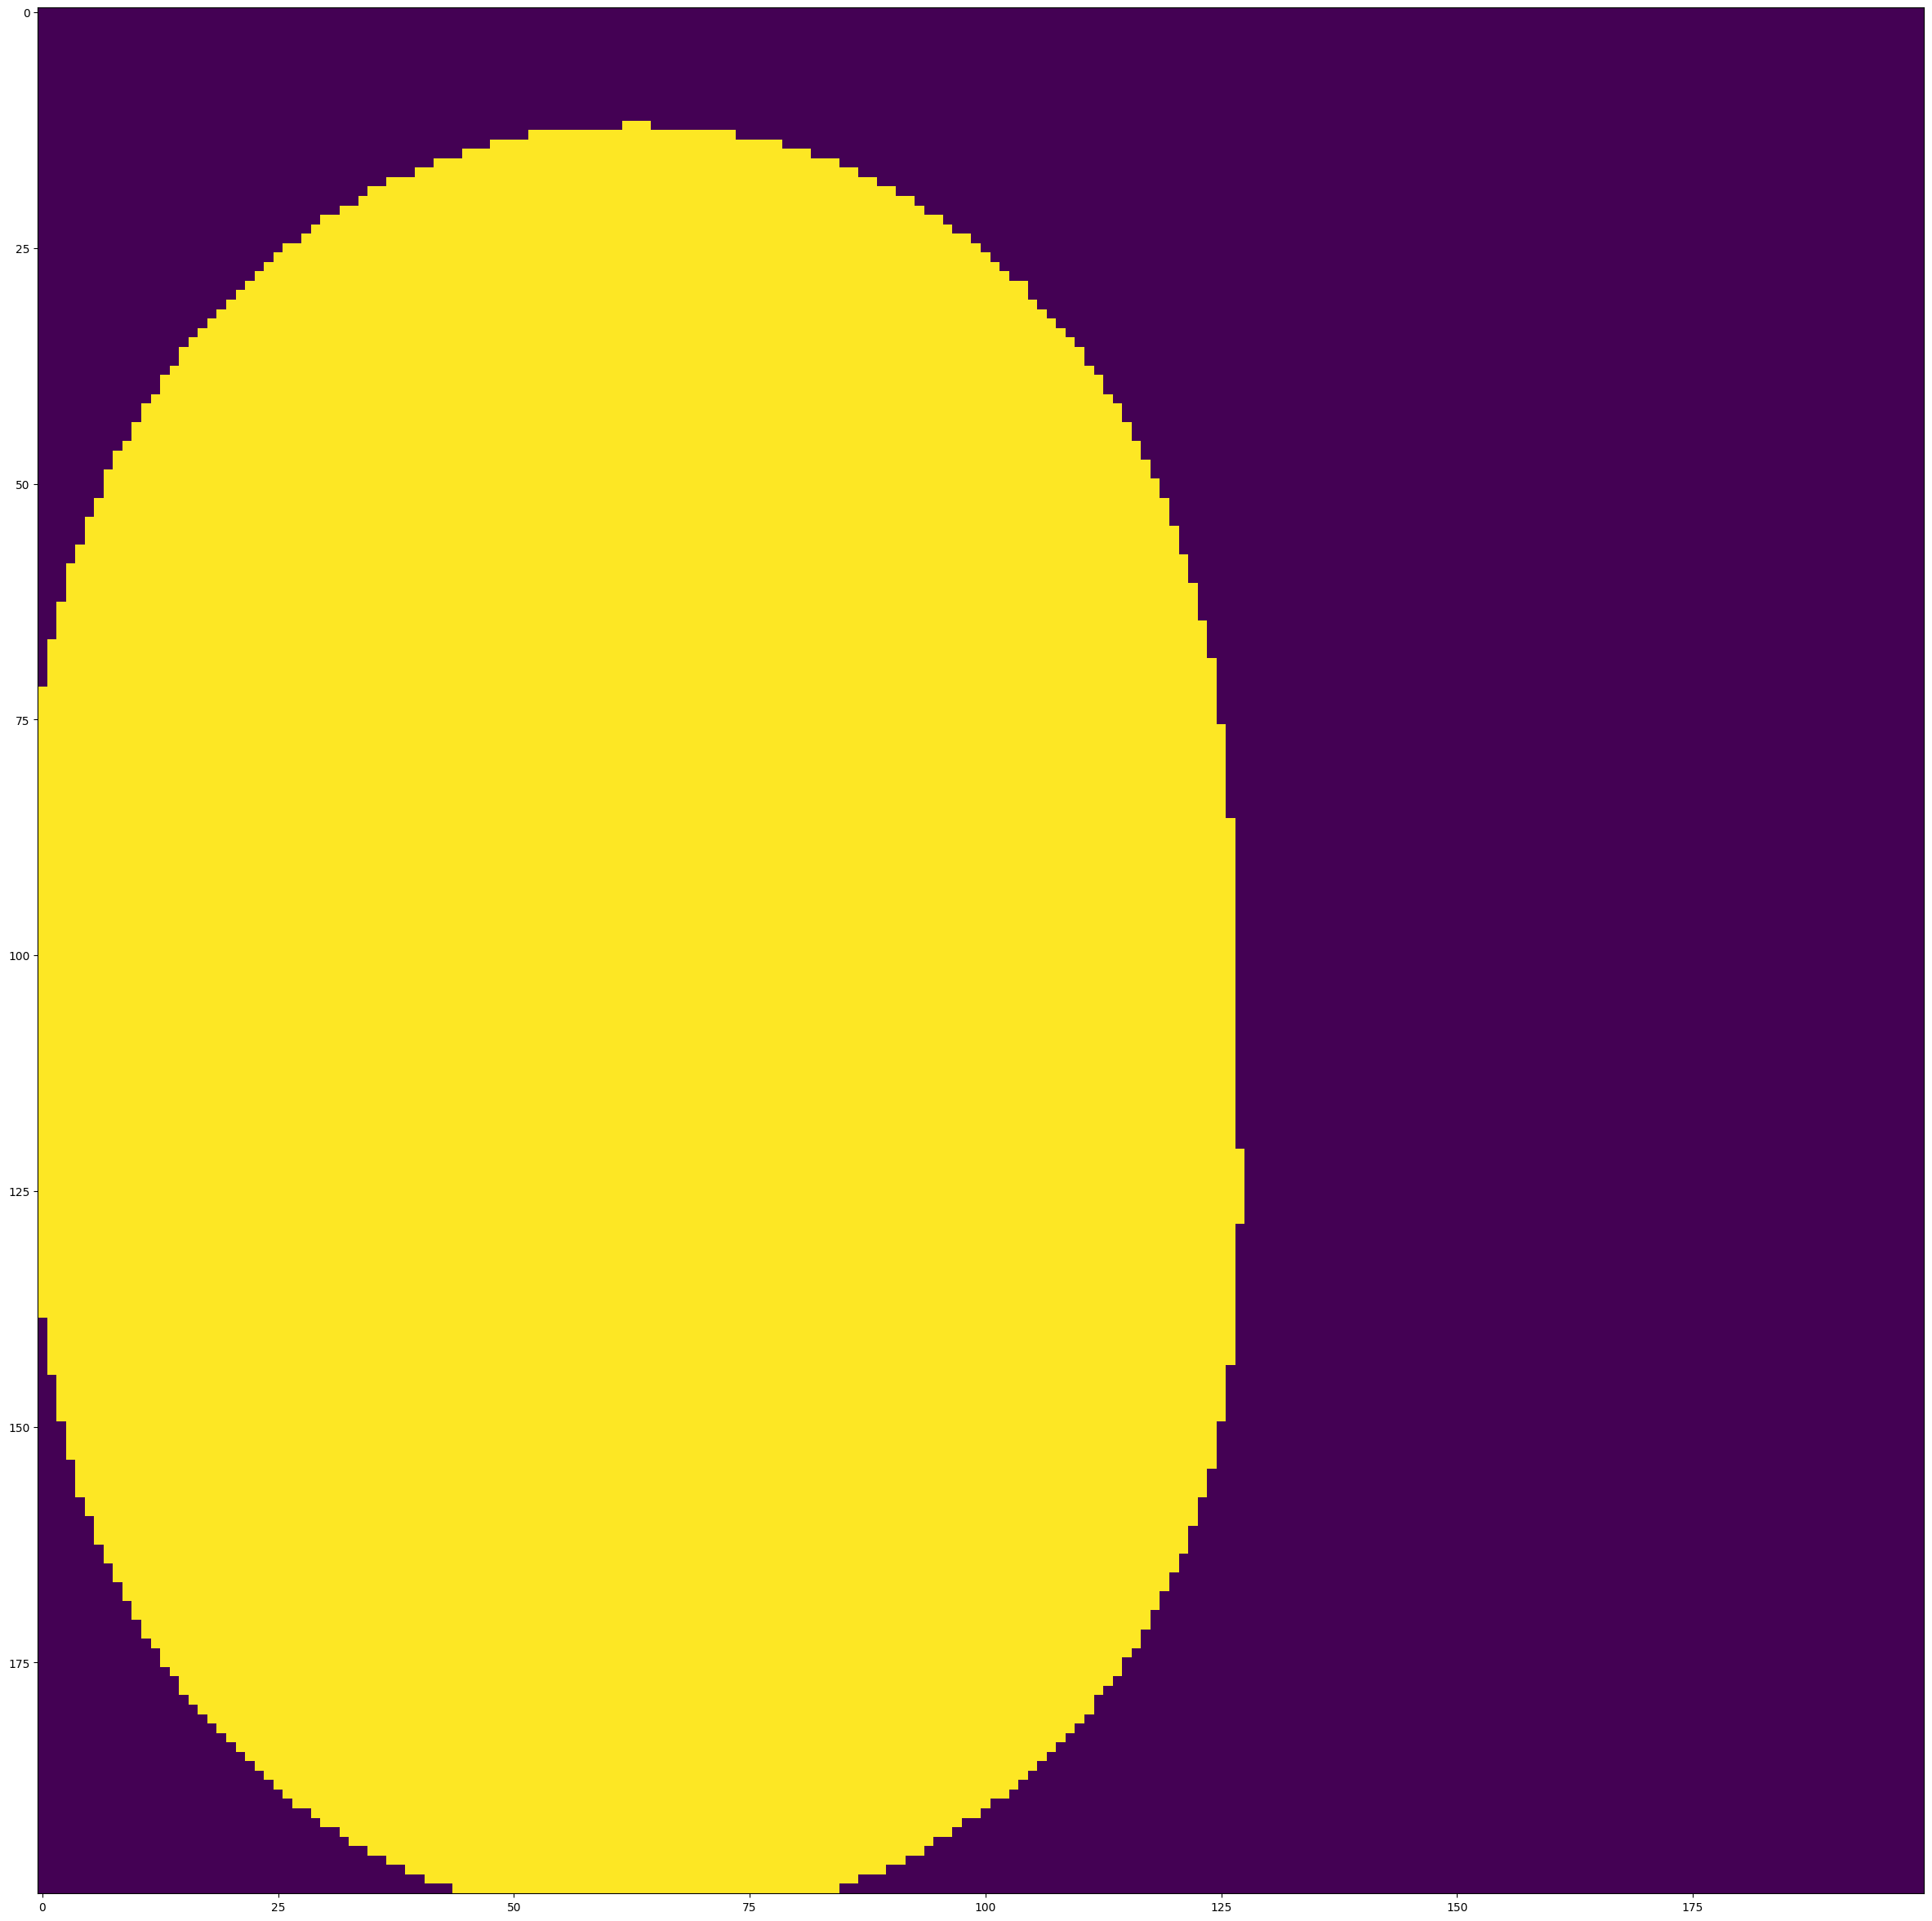

In [3]:

N=4
a=0.3
G,S=ensalea(N,a,True)




In [4]:
def echant(l,g,s):
    X1=np.random.uniform(0,1,l)
    X2=np.random.uniform(0,1,l)
    Y=[]
    for i in range(len(X1)):
        Y.append(2*(f([X1[i],X2[i]],g,s) >=(1/2)) -1)
    return X1,X2,Y
        

In [5]:
X1,X2,Y=echant(1000,G,S)

In [6]:
def estens(X1,X2,Y,p):
    l_pos=np.zeros((p,p))
    l_neg=np.zeros((p,p))
    B=np.zeros((p,p))
    Re=0
    
    for i in range(len(X1)):
        #print(Y[i])
        if Y[i]==1:
            l_pos[int(X1[i]*p),int(X2[i]*p)]+=1
        else:
            l_neg[int(X1[i]*p),int(X2[i]*p)]+=1
    
    for i in range(p):
        for j in range(p):
            if l_pos[i,j]>=l_neg[i,j]:
                
                B[i,j]=1
                Re+=l_neg[i,j]
            else :
                B[i,j]=0
                
                Re+=l_pos[i,j]
    
    return B,(Re/len(X1))

In [7]:
B,Re=estens(X1,X2,Y,10)

In [8]:
print(B)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]


In [9]:
def plot(X1,X2,Y,B):
    plt.axes()
    plt.imshow(np.zeros((100,100)))
    
    for i in range(len(X1)):
        if Y[i]==1:
            
            plt.scatter(X2[i]*100,X1[i]*100,s=2,c='red')
        else :
            plt.scatter(X2[i]*100,X1[i]*100,s=2,c='blue')
    p=len(B)
    for n in range(p):
        for m in range(p):
            if B[m,n]==1:
               
                rec=plt.Rectangle((n*(100/p),m*(100/p)), 100/p, 100/p,fill=False,ec="red",lw=5)
                
                
                plt.gca().add_patch(rec)
    plt.show()

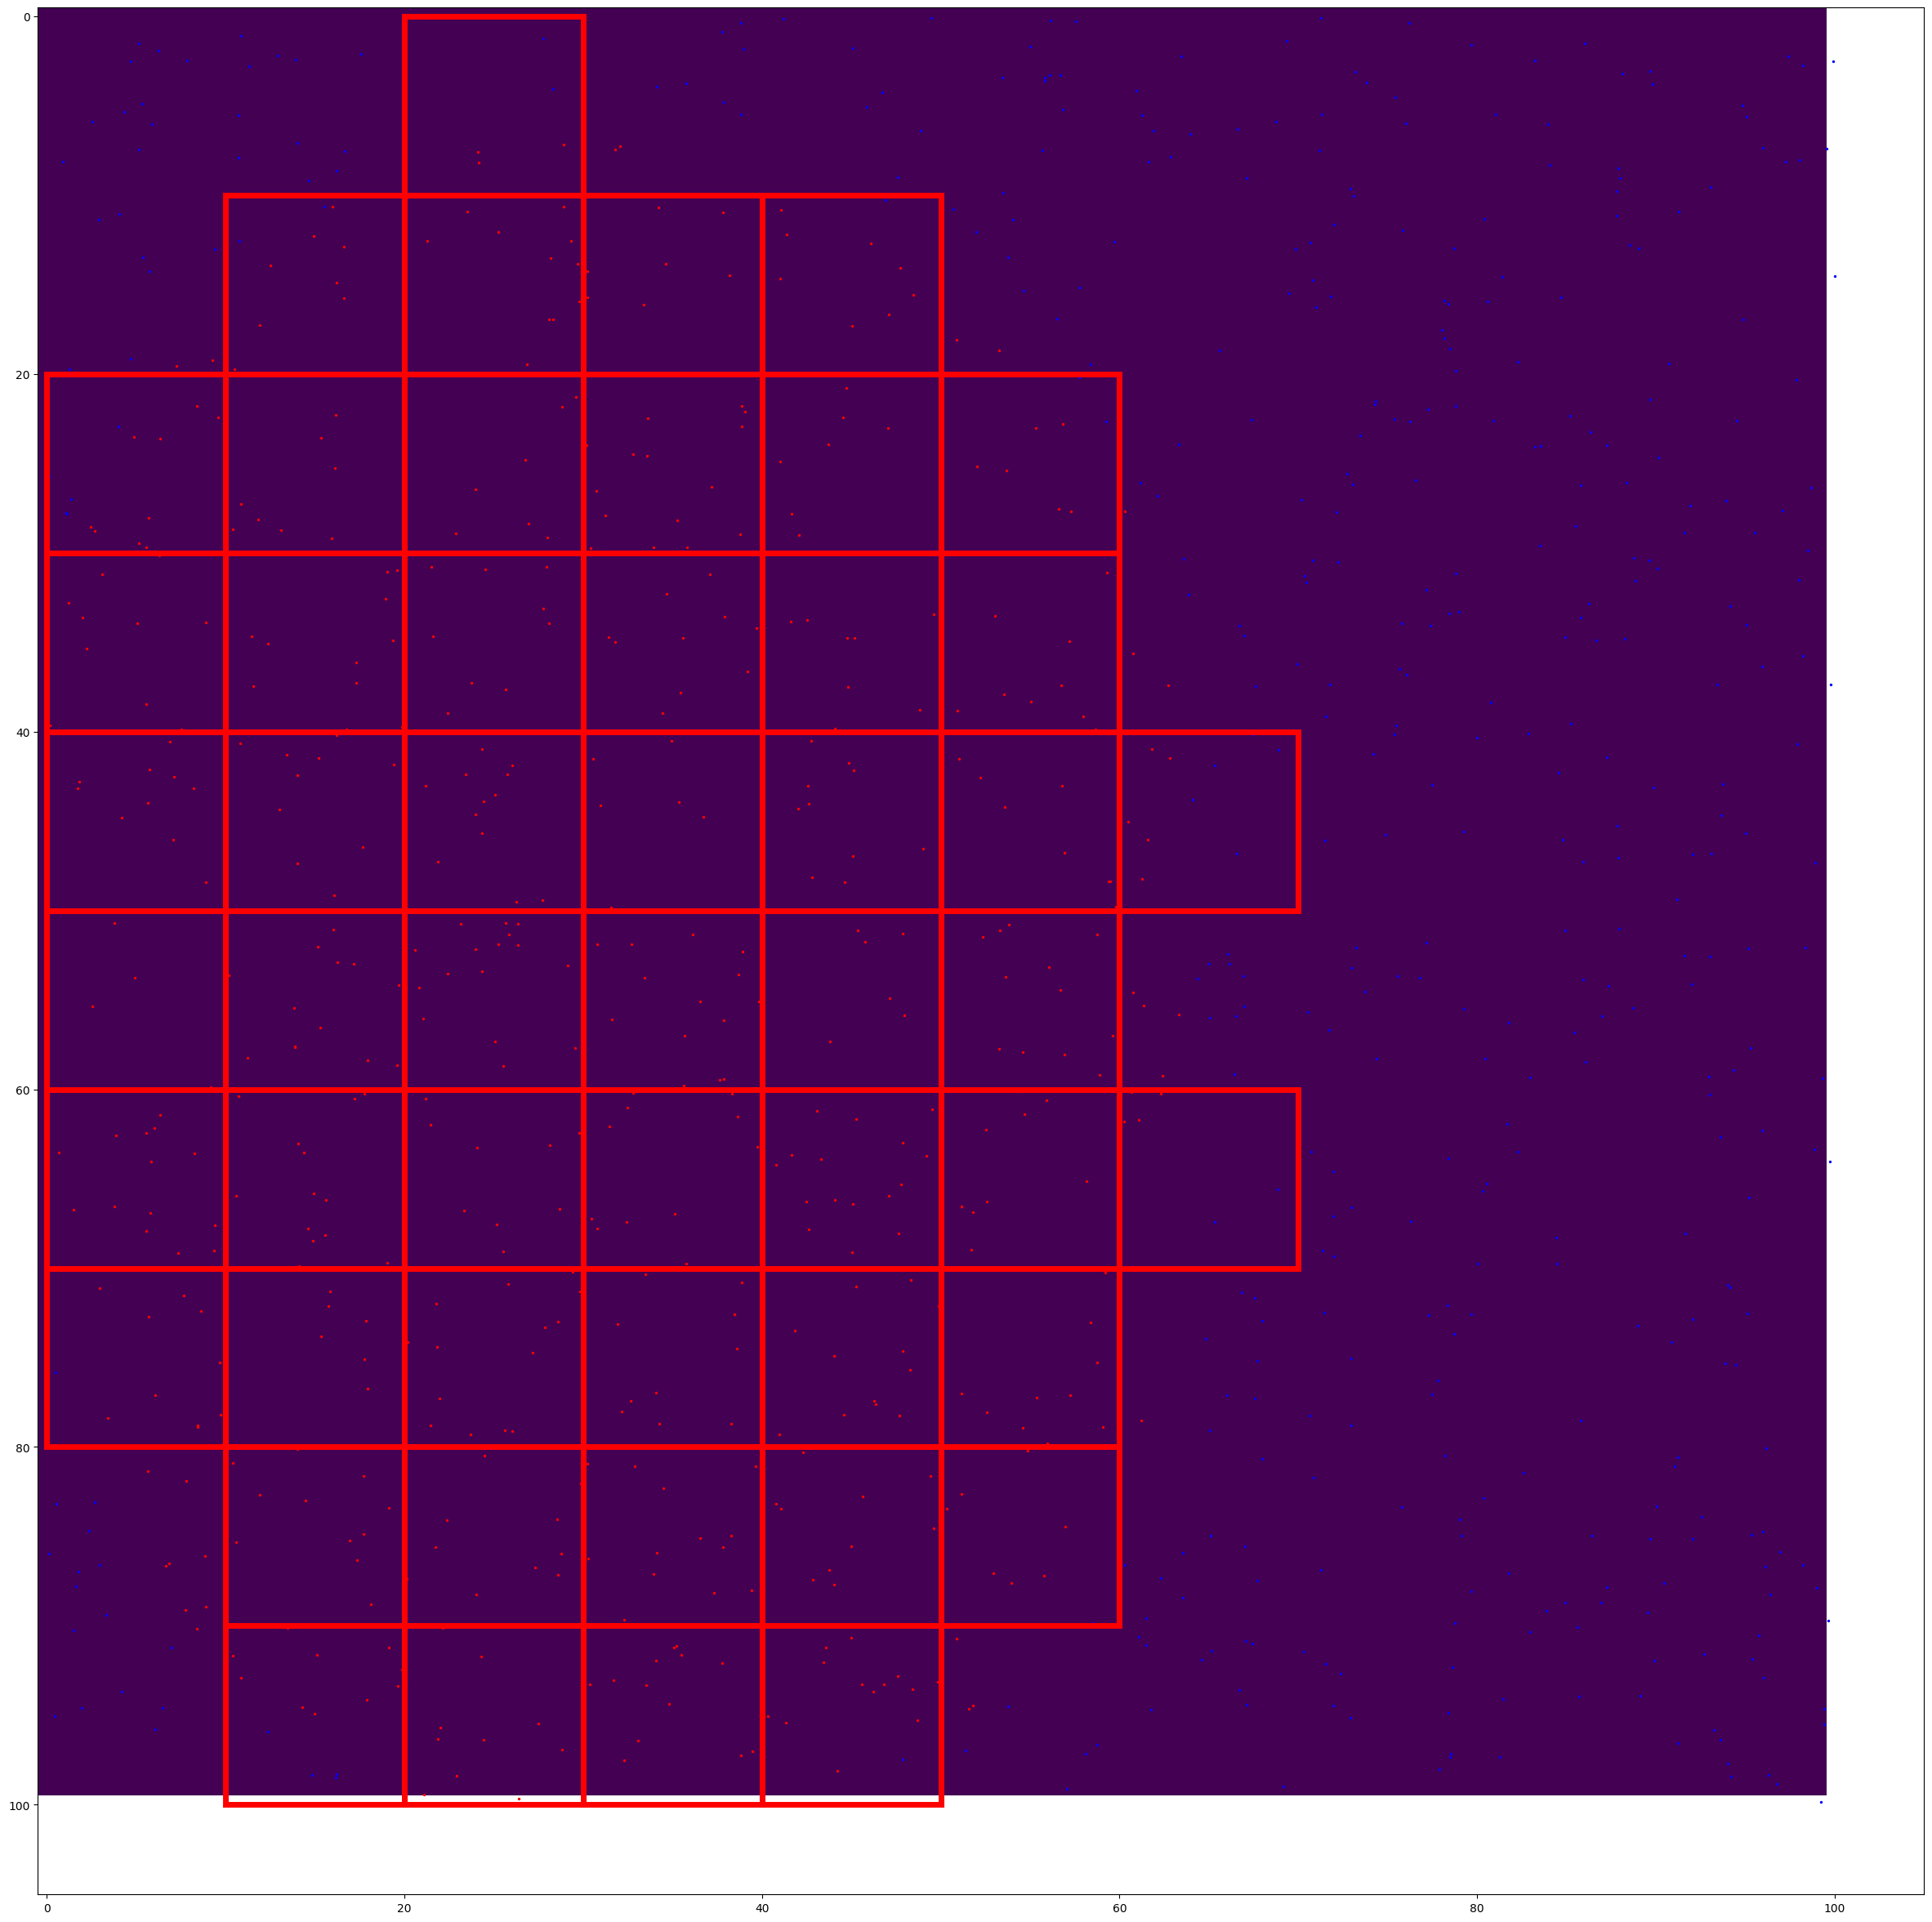

In [10]:
plot(X1,X2,Y,B)

In [22]:
def testens(B,m,g,s):
    X1,X2,Y=echant(m,g,s)
    R=0
    for i in range(len(Y)):
        R+=1*(B[int(1-X1[i]*len(B)),int(X2[i]*len(B))]==Y[i])
    return R/m

In [23]:
testens(B,1000,G,S)

0.492

In [24]:
'''l=1000
m = 5000
p=5
G,S = ensalea(4,0.3,True)
x,y,label = echant(l,G,S)
#plot_echant(x,y)
B,Re = estens(x,y,label,p)
#plot_B(B)
plot(x,y,label,B)
#display(Re)
#Xtest,Ytest = echant(m,g,s)
#display(testens(B,Xtest,Ytest))'''

'l=1000\nm = 5000\np=5\nG,S = ensalea(4,0.3,True)\nx,y,label = echant(l,G,S)\n#plot_echant(x,y)\nB,Re = estens(x,y,label,p)\n#plot_B(B)\nplot(x,y,label,B)\n#display(Re)\n#Xtest,Ytest = echant(m,g,s)\n#display(testens(B,Xtest,Ytest))'

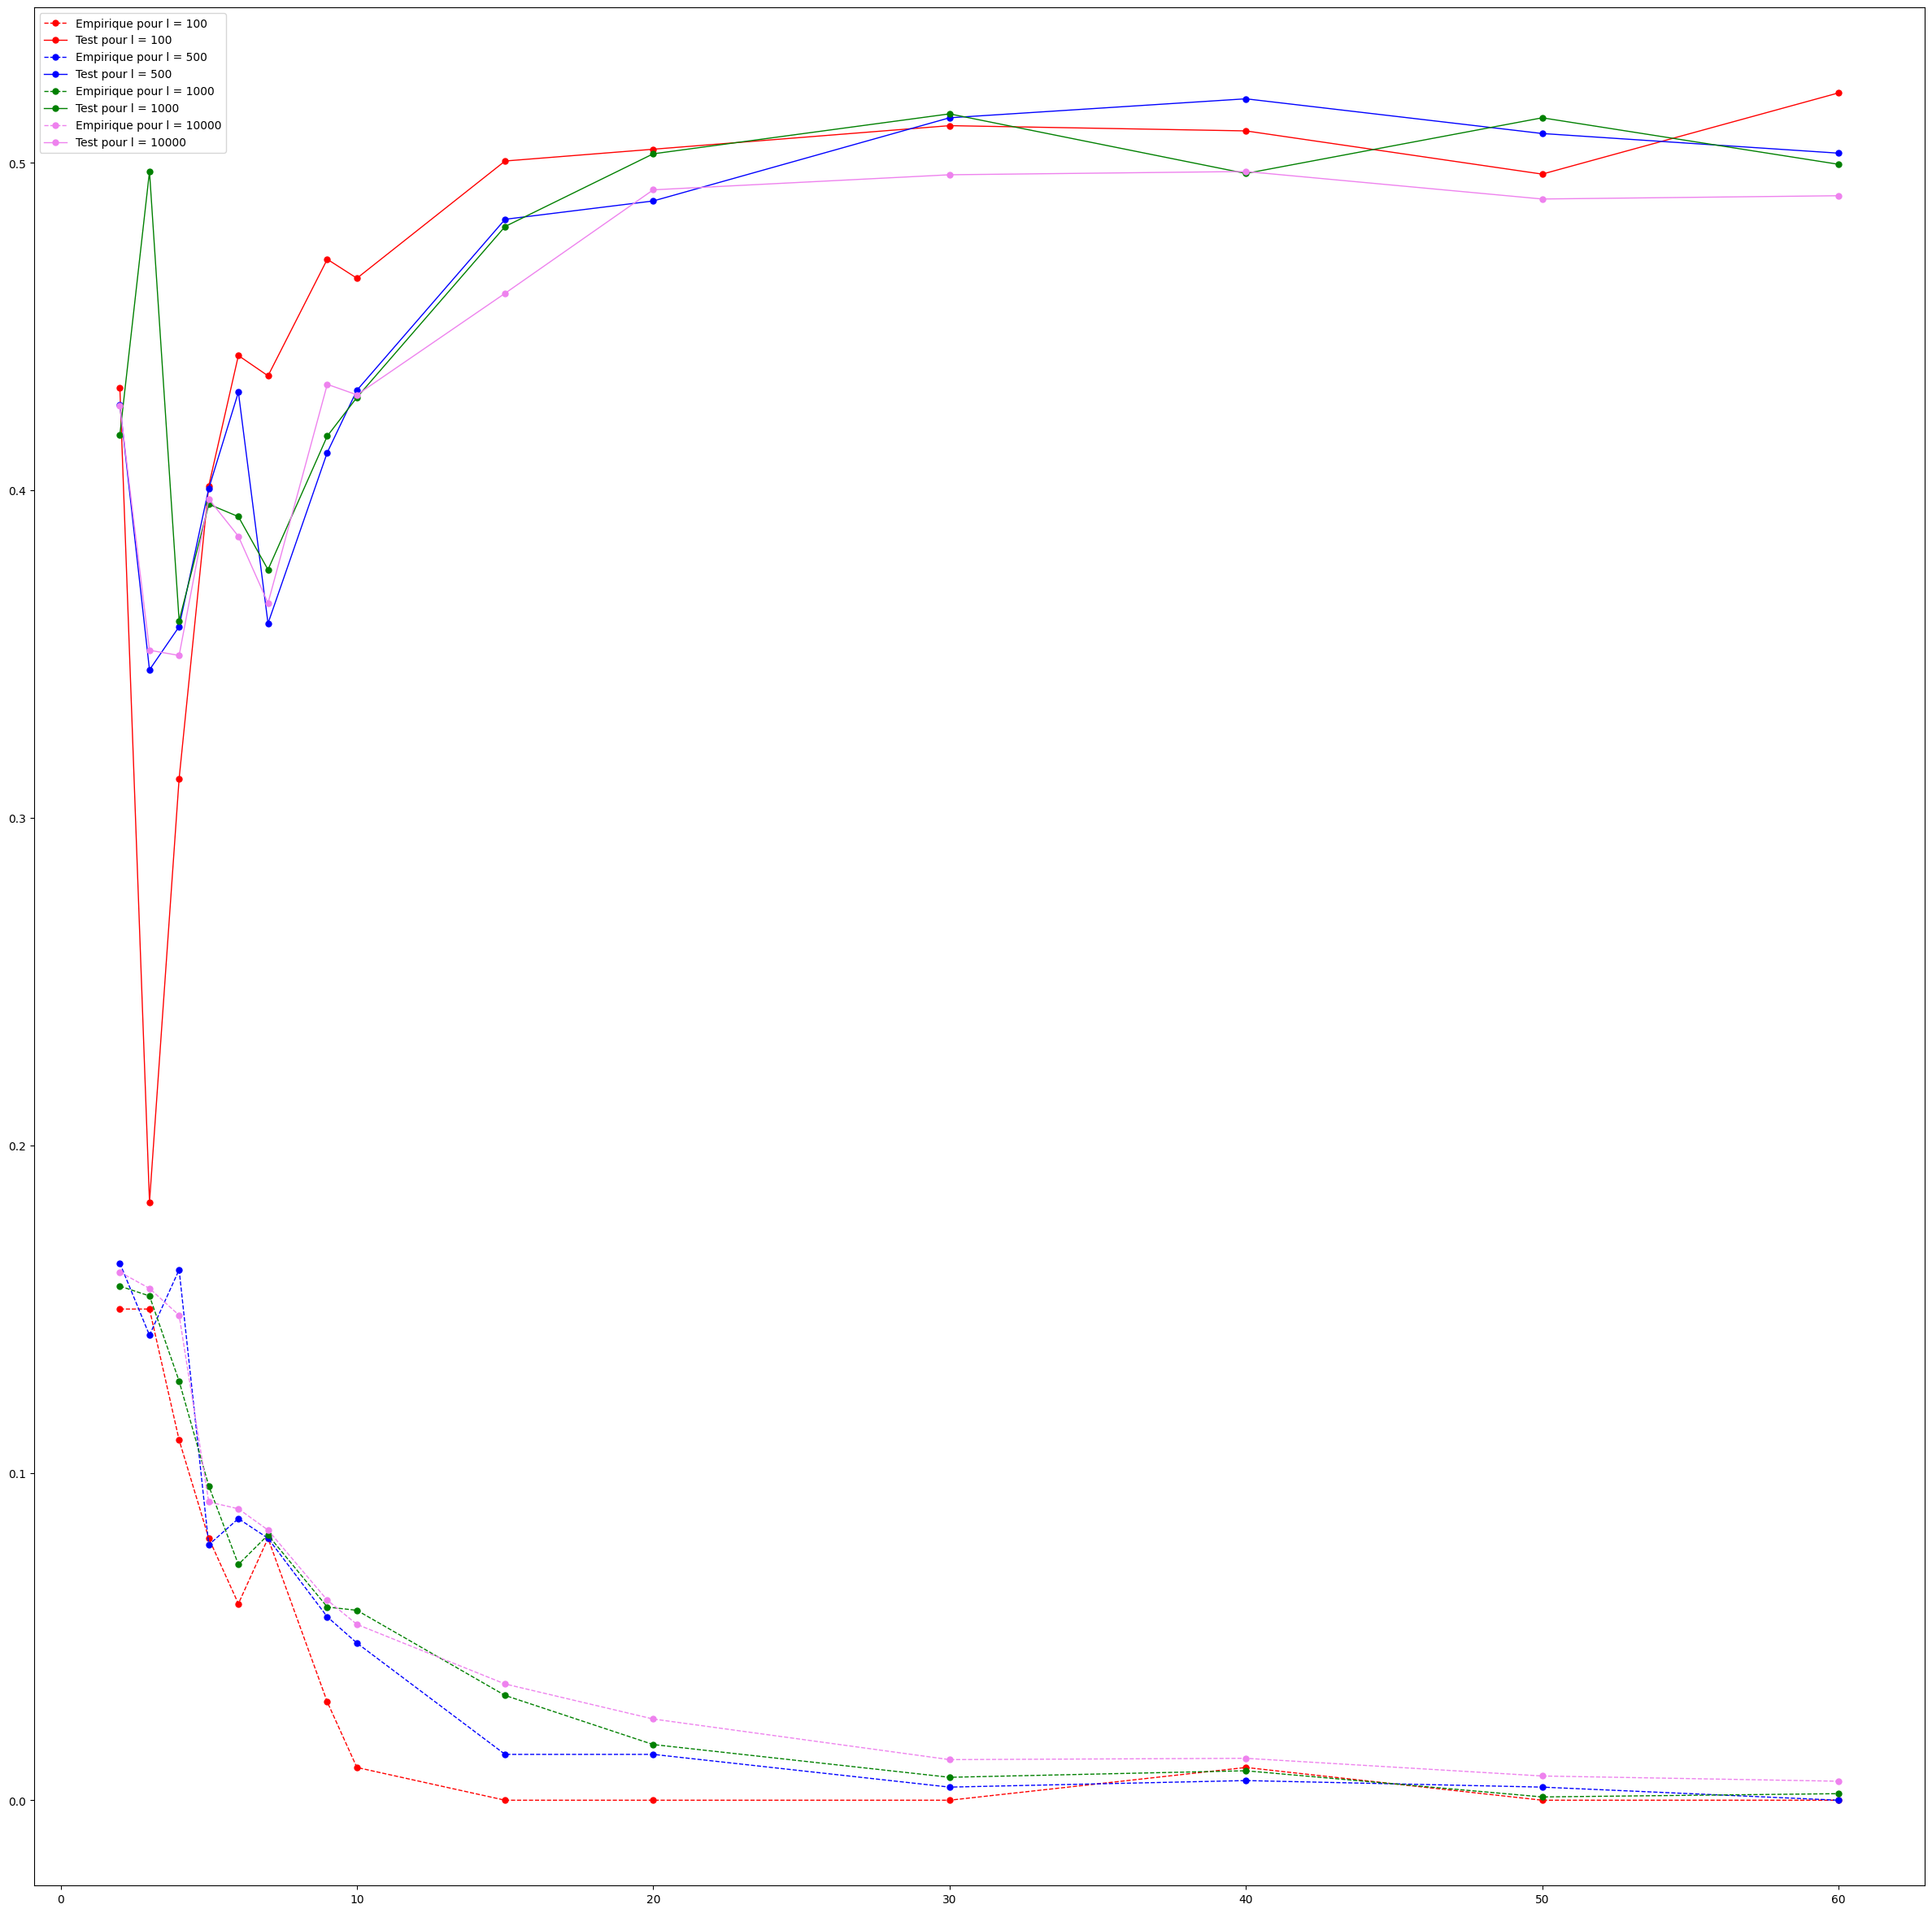

In [25]:
m = 5000

plt.axis()
COLOR=['red','blue','green','violet']
i=0
P= [2,3,4,5,6,7,9,10,15,20,30,40,50,60]
for l in [100,500,1000,10000]:
    RE=[]
    Rtest=[]
    for p in P:
        x,y,label = echant(l,G,S)
        B,Re = estens(x,y,label,p)
        
        R_test=testens(B,m,G,S)
        RE.append(Re)
        Rtest.append(R_test)
    plt.plot(P,RE,'o--', linewidth=1, markersize=5,c=COLOR[i], label = f'Empirique pour l = {l}')
    plt.plot(P,Rtest,'o-', linewidth=1, markersize=5,c=COLOR[i], label = f'Test pour l = {l}')
    
 
    i+=1
plt.legend()
plt.show()